In [78]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns

In [79]:
citynamelist=["bj","sh","gz","sz","zz"]
citynamelist_chinese=["北京","上海","广州","深圳","郑州"]
df_list=[]

In [80]:
result={}
for i in range(len(citynamelist)):
    filename=citynamelist[i]+"2.csv"
    """name_chinese,block,house_type,direct,area,price"""
    df = pd.read_csv(filename, encoding='utf-8-sig')
    df = df.drop_duplicates()  # 去重
    df = df.dropna()  # 去空值
    #输出数据数量
    print(citynamelist_chinese[i]+"的数据数量为：",len(df))
    df_list.append(df)

北京的数据数量为： 36478
上海的数据数量为： 27000
广州的数据数量为： 51412
深圳的数据数量为： 21303
郑州的数据数量为： 21796


In [81]:
for i in range(len(citynamelist)):
    df_list[i]["pre_price"]=df_list[i]["price"]/df_list[i]["area"]

In [82]:
direct_list=["东","南","西","北","东南","东北","西南","西北"]
for i in range(len(citynamelist)):
    df_list[i]["direct"]=df_list[i]["direct"].apply(lambda x: x.split("/")[0] if x.split("/")[0] in direct_list else None)
    df.dropna()
    print(df_list[i]["direct"].value_counts())

direct
南     24568
东      4287
西      1948
东南     1655
北      1599
西南     1231
西北      642
东北      524
Name: count, dtype: int64
direct
南     24534
北       645
东       548
东南      479
西       298
西南      270
西北       80
东北       55
Name: count, dtype: int64
direct
南     23133
东南     8293
北      6505
东      5005
西南     2196
东北     1846
西      1310
西北      986
Name: count, dtype: int64
direct
南     8184
东南    4912
西南    1527
北     1403
东     1372
西北     683
东北     674
西      470
Name: count, dtype: int64
direct
南     15422
东      1498
北      1405
西       837
东南      826
西南      452
西北      213
东北      141
Name: count, dtype: int64


In [83]:
for i in range(len(citynamelist)):
    result[citynamelist_chinese[i]]=df_list[i].groupby("direct")["pre_price"].mean()
    print(citynamelist_chinese[i]+"的朝向数量为：",len(result[citynamelist_chinese[i]]))
    print(result[citynamelist_chinese[i]])
    print("--------------------------------------------------")

北京的朝向数量为： 8
direct
东     108.358711
东北    106.085352
东南    102.649433
北     118.973375
南      90.483410
西     110.478478
西北    106.458907
西南    101.871385
Name: pre_price, dtype: float64
--------------------------------------------------
上海的朝向数量为： 8
direct
东     124.402859
东北    118.591448
东南    115.375201
北     125.710787
南      97.170399
西     123.662542
西北    138.962418
西南    125.764428
Name: pre_price, dtype: float64
--------------------------------------------------
广州的朝向数量为： 8
direct
东     61.633372
东北    47.599844
东南    51.800236
北     52.359583
南     49.110575
西     62.658937
西北    53.684822
西南    53.886167
Name: pre_price, dtype: float64
--------------------------------------------------
深圳的朝向数量为： 8
direct
东     103.229036
东北     94.378495
东南     85.374174
北      99.265718
南      88.446401
西     110.813338
西北     92.672333
西南     89.056923
Name: pre_price, dtype: float64
--------------------------------------------------
郑州的朝向数量为： 8
direct
东     27.547169
东北    30.154301
东南   

In [84]:
#把所以df_list合起来
df_all=pd.concat(df_list)
print(df_all["name_chinese"].value_counts())
print(df_all[df_all["direct"]=="广州"])

name_chinese
广州    51412
北京    36478
上海    27000
郑州    21796
深圳    21303
Name: count, dtype: int64
Empty DataFrame
Columns: [name_chinese, block, house_type, direct, area, price, pre_price]
Index: []


Text(95.97222222222221, 0.5, '城市')

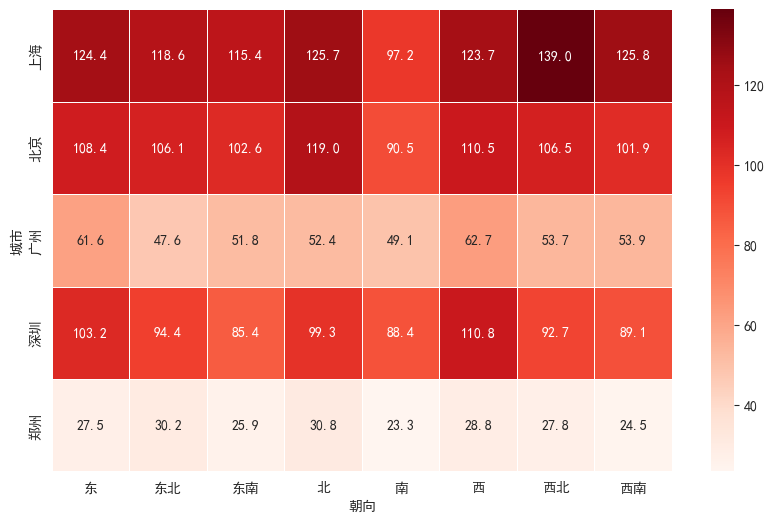

In [87]:
#根据name_chinese和direct绘制pre_price的热力图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(10,6))
#红色
sns.heatmap(df_all.pivot_table(index="name_chinese",columns="direct",values="pre_price"),annot=True,fmt=".1f",linewidths=.5,cmap="Reds")
#更改一下坐标轴的名字
plt.xlabel("朝向")
plt.ylabel("城市")


